In [1]:
# import libraries
import pandas as pd
import numpy as np
import re
# data visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.dates import DateFormatter, AutoDateLocator

In [5]:
# DATA EXPLORATION AND CLEANING
# read the database
dtfashion = pd.read_csv('fashion.csv')
dtfashion.copy()
dtfashion.head(7)

,user_uuid,category,designer_id,language,level,country,purchase_date,platform,item_id,stars,subscription_date
0,183,belt,120,en,cheap,uk,13-7-2022,android,3521,1,20-8-2021
1,134,underwear,102,it,cheap,it,2-5-2023,android,6239,2,20-11-2022
2,158,belt,106,it,cheap,it,6-8-2021,pc,3618,3,18-3-2020
3,82,shoes,102,it,premium,it,18-7-2023,android,5281,4,21-1-2022
4,201,shoes,113,en,average,uk,7-5-2023,android,5260,1,25-11-2022
5,191,dress,119,en,cheap,uk,23-2-2023,pc,7542,5,15-5-2021
6,181,belt,121,en,premium,uk,5-11-2022,apple,3237,2,9-12-2020


In [7]:
# DATA EXPLORATION
# show the number of rows and columns in the dataset
dtfashion.shape

(999, 11)

In [9]:
# return the names of the columns in this DataFrame
dtfashion.columns

Index(['user_uuid', 'category', 'designer_id', 'language', 'level', 'country',
       'purchase_date', 'platform', 'item_id', 'stars', 'subscription_date'],
      dtype='object')

In [11]:
# check the column names and the data types they contain
dtfashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_uuid          999 non-null    int64 
 1   category           999 non-null    object
 2   designer_id        999 non-null    int64 
 3   language           999 non-null    object
 4   level              999 non-null    object
 5   country            999 non-null    object
 6   purchase_date      999 non-null    object
 7   platform           999 non-null    object
 8   item_id            999 non-null    int64 
 9   stars              999 non-null    int64 
 10  subscription_date  999 non-null    object
dtypes: int64(4), object(7)
memory usage: 86.0+ KB


In [13]:
# descriptive summary of statistical data such as mean and std of numerical values in the series
dtfashion.describe()

,user_uuid,designer_id,item_id,stars
count,999.000000,999.000000,999.000000,999.000000
mean,126.206206,110.769770,4032.721722,3.013013
std,68.581911,6.623049,2266.843497,1.415216
min,1.000000,100.000000,26.000000,1.000000
25%,69.000000,105.000000,2248.000000,2.000000
50%,128.000000,111.000000,3662.000000,3.000000
75%,183.500000,116.000000,5972.500000,4.000000
max,245.000000,122.000000,11000.000000,5.000000


In [15]:
# visualize correlations of numerical values with Int64 type
correlation_int64 = dtfashion[['user_uuid', 'designer_id', 'item_id', 'stars']].corr()
correlation_int64

,user_uuid,designer_id,item_id,stars
user_uuid,1.000000,0.015529,0.004009,-0.002815
designer_id,0.015529,1.000000,-0.032776,-0.017212
item_id,0.004009,-0.032776,1.000000,-0.002449
stars,-0.002815,-0.017212,-0.002449,1.000000


In [17]:
# analyze and sum the null values in the table
total_null_count = dtfashion.isnull().sum()
# calculate the total number of values in each column
total_count = dtfashion.shape[0]
# calculate the percentage of null values in each column
total_null_percentage = ((total_null_count / total_count) * 100).round(2).astype(str) + '%'
# create a new DataFrame containing the null values and their percentage
null_data_info = pd.DataFrame({'N. Null': total_null_count, '% Null': total_null_percentage})
null_data_info

,N. Null,% Null
user_uuid,0,0.0%
category,0,0.0%
designer_id,0,0.0%
language,0,0.0%
level,0,0.0%
country,0,0.0%
purchase_date,0,0.0%
platform,0,0.0%
item_id,0,0.0%
stars,0,0.0%


# Information about the `dtfashion` dataset

The dataset contains **11 columns** and **999 rows**. Specifically, the columns are:  

- **user_uuid**: identifier of the selling user, data type is integer, ranging from 1 to 245  
- **category**: clothing category, data type is object  
- **designer_id**: identifier of the designer, data type is integer, ranging from 100 to 122  
- **language**: language of the selling user, data type is object  
- **level**: price range, data type is object  
- **country**: nationality of the selling user, data type is object  
- **purchase_date**: date when the product was sold, data type is object  
- **platform**: platform used for the payment, data type is object  
- **item_id**: product identifier, data type is integer, ranging from 26 to 11,000  
- **stars**: average stars given to the product, data type is integer, ranging from 1 to 5  
- **subscription_date**: date when the selling user subscribed, data type is object  

As shown in the dataset analysis, there are **no missing values**, meaning all records are fully populated and no data is missing.


In [22]:
# define a function that extracts the year from a string using a regular expression
def extract_year_from_str(text):
    # use the findall function to return a list of all regex matches in text
    year = re.findall(r"(\d{4})", text)
    if year:
        # return the first element (index 0) of year
        return int(year[0])
    else:
        return None

# apply the function to extract the year from purchase_date
dtfashion['purchase_year'] = dtfashion['purchase_date'].apply(extract_year_from_str)
# replace missing values with 0 and convert to int
dtfashion['purchase_year'] = dtfashion['purchase_year'].fillna(0).astype(int)

# apply the function to extract the year from subscription_date
dtfashion['subscription_year'] = dtfashion['subscription_date'].apply(extract_year_from_str)
# replace missing values with 0 and convert to int
dtfashion['subscription_year'] = dtfashion['subscription_year'].fillna(0).astype(int)

dtfashion

,user_uuid,category,designer_id,language,level,country,purchase_date,platform,item_id,stars,subscription_date,purchase_year,subscription_year
0,183,belt,120,en,cheap,uk,13-7-2022,android,3521,1,20-8-2021,2022,2021
1,134,underwear,102,it,cheap,it,2-5-2023,android,6239,2,20-11-2022,2023,2022
2,158,belt,106,it,cheap,it,6-8-2021,pc,3618,3,18-3-2020,2021,2020
3,82,shoes,102,it,premium,it,18-7-2023,android,5281,4,21-1-2022,2023,2022
4,201,shoes,113,en,average,uk,7-5-2023,android,5260,1,25-11-2022,2023,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,belt,104,fr,average,fr,7-6-2023,android,3791,2,22-7-2020,2023,2020
995,81,shoes,101,it,premium,it,10-11-2023,android,587,2,23-8-2022,2023,2022
996,173,activewear,101,fr,premium,fr,22-11-2023,android,6882,2,12-12-2021,2023,2021
997,41,belt,109,fr,cheap,fr,12-12-2023,android,3558,5,1-8-2021,2023,2021


In [24]:
# define a function that extracts the quarter from purchase_date using a regular expression
def extract_yearquarter_from_date(text):
    q = ''
    # regex to capture the month as a digit group
    month_regex = r"-(\d+)-"  
    # regex to capture the year as a 4-digit group
    year_regex = r"-(\d{4})"
    
    month_match = re.search(month_regex, text)
    year_match = re.search(year_regex, text)
    
    if month_match and year_match:
        month = int(month_match.group(1))  # extract month as integer
        year = year_match.group(1)          # extract year as string
        
        # determine the quarter based on the month
        if month < 4:
            q = f"{year} Q1"
        elif month < 7:
            q = f"{year} Q2"
        elif month < 10:
            q = f"{year} Q3"
        else:
            q = f"{year} Q4"
        return q
    else:
        return None

# apply the function to the purchase_date column to extract year and quarter
dtfashion['yquarter_purchase'] = dtfashion['purchase_date'].apply(extract_yearquarter_from_date)
# convert the column to string type
dtfashion['yquarter_purchase'] = dtfashion['yquarter_purchase'].astype(str)

dtfashion


,user_uuid,category,designer_id,language,level,country,purchase_date,platform,item_id,stars,subscription_date,purchase_year,subscription_year,yquarter_purchase
0,183,belt,120,en,cheap,uk,13-7-2022,android,3521,1,20-8-2021,2022,2021,2022 Q3
1,134,underwear,102,it,cheap,it,2-5-2023,android,6239,2,20-11-2022,2023,2022,2023 Q2
2,158,belt,106,it,cheap,it,6-8-2021,pc,3618,3,18-3-2020,2021,2020,2021 Q3
3,82,shoes,102,it,premium,it,18-7-2023,android,5281,4,21-1-2022,2023,2022,2023 Q3
4,201,shoes,113,en,average,uk,7-5-2023,android,5260,1,25-11-2022,2023,2022,2023 Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,belt,104,fr,average,fr,7-6-2023,android,3791,2,22-7-2020,2023,2020,2023 Q2
995,81,shoes,101,it,premium,it,10-11-2023,android,587,2,23-8-2022,2023,2022,2023 Q4
996,173,activewear,101,fr,premium,fr,22-11-2023,android,6882,2,12-12-2021,2023,2021,2023 Q4
997,41,belt,109,fr,cheap,fr,12-12-2023,android,3558,5,1-8-2021,2023,2021,2023 Q4


In [26]:
# calculate the number of unique users in the dtfashion dataset
n_unique_users = dtfashion['user_uuid'].nunique()
n_unique_users

241

In [28]:
# analyze and sum the null values in the table
total_null_count = dtfashion.isnull().sum()
# calculate the total number of values in each column
total_count = dtfashion.shape[0]
# calculate the percentage of null values in each column
total_null_percent = ((total_null_count / total_count) * 100).round(2).astype(str) + '%'
# create a new DataFrame containing the null count and percentage
dataset_null_info = pd.DataFrame({'Null Count': total_null_count, '% Null': total_null_percent})
dataset_null_info

,Null Count,% Null
user_uuid,0,0.0%
category,0,0.0%
designer_id,0,0.0%
language,0,0.0%
level,0,0.0%
country,0,0.0%
purchase_date,0,0.0%
platform,0,0.0%
item_id,0,0.0%
stars,0,0.0%


# Cleaning the dtfashion Dataset

Two new columns have been added to the dataset to facilitate analysis and data visualization. Specifically, the columns are:

- `purchase_year`: the year the product was sold (data type: object)
- `subscription_year`: the year the user subscribed to the sales platform (data type: object)

After adding these columns, the dataset has 999 rows and 13 columns, with no null or undefined values.


In [31]:
# DATA ANALYSIS AND VISUALIZATION
# calculate the number of sales for each year-quarter
sales_per_yearquarter = dtfashion['yquarter_purchase'].value_counts()
# sort the results in ascending order
sales_per_yearquarter_asc = sales_per_yearquarter.sort_values(ascending=True)
sales_per_yearquarter_asc

yquarter_purchase
2021 Q2     19
2021 Q1     23
2021 Q3     25
2021 Q4     26
2022 Q3     71
2022 Q1     73
2022 Q4     76
2022 Q2     88
2023 Q2    137
2023 Q4    144
2023 Q1    150
2023 Q3    167
Name: count, dtype: int64

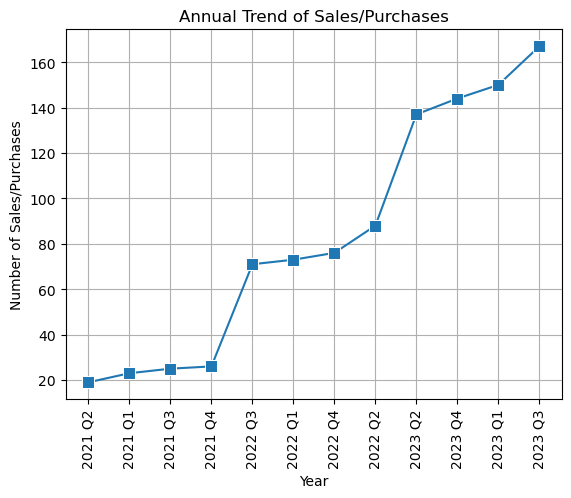

In [33]:
# create a line plot to show the annual trend of sales
line_plot = sns.lineplot(
    x=sales_per_yearquarter_asc.index, 
    y=sales_per_yearquarter_asc.values, 
    marker='s', 
    markersize=8
)

plt.xlabel('Year')
plt.ylabel('Number of Sales/Purchases')
plt.title('Annual Trend of Sales/Purchases')

plt.xticks(rotation=90)
plt.grid(True)
plt.show()

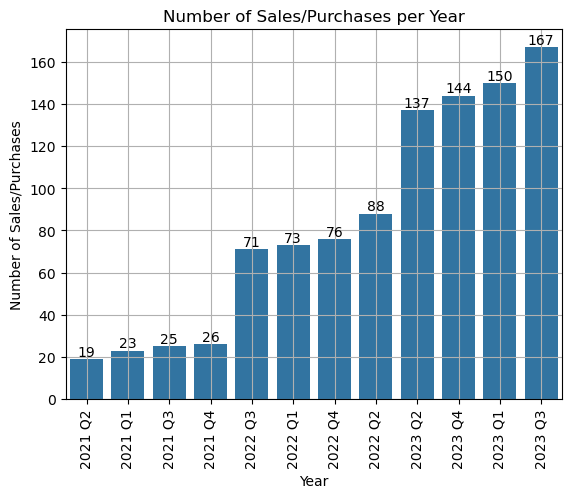

In [35]:
# visualize sales grouped by year using a bar plot
bar_plot = sns.barplot(x=sales_per_yearquarter_asc.index, y=sales_per_yearquarter_asc.values)

plt.xlabel('Year')
plt.ylabel('Number of Sales/Purchases')
plt.title('Number of Sales/Purchases per Year')
plt.grid(True)
plt.xticks(rotation=90)

# add value labels on top of each bar
for index, value in enumerate(sales_per_yearquarter_asc.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()


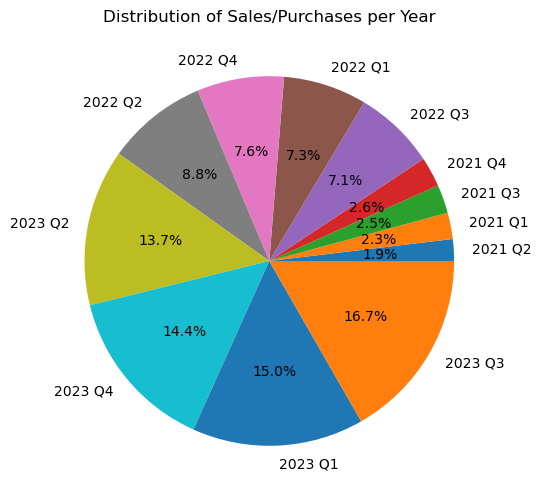

In [41]:
# create a pie chart for sales grouped by year
plt.figure(figsize=(10, 6))
plt.pie(sales_per_yearquarter_asc.values, labels=sales_per_yearquarter_asc.index, autopct='%1.1f%%')
plt.title('Distribution of Sales/Purchases per Year')
plt.show()

In [43]:
# calculate the number of purchases for each platform
purchases_per_platform = dtfashion['platform'].value_counts()
purchases_per_platform

platform
android    458
pc         330
apple      211
Name: count, dtype: int64

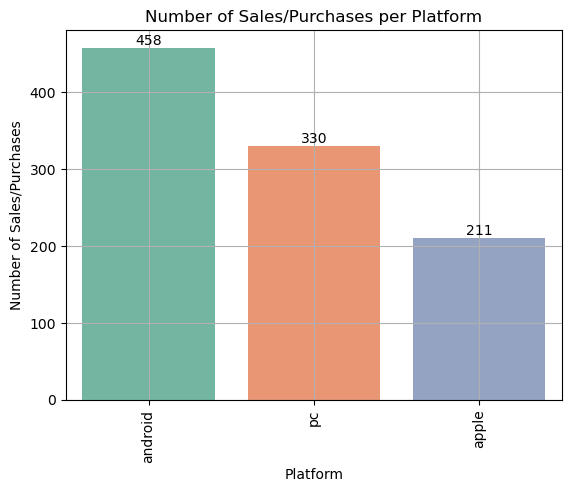

In [55]:
# calculate the number of purchases for each platform and plot a bar chart 
bar_plot = sns.barplot(
    x=purchases_per_platform.index, 
    y=purchases_per_platform.values, 
    hue=purchases_per_platform.index,  # assign x values to hue
    palette="Set2",  
    dodge=False      
)

plt.xlabel('Platform')
plt.ylabel('Number of Sales/Purchases')
plt.title('Number of Sales/Purchases per Platform')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)  # remove legend

for index, value in enumerate(purchases_per_platform.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [57]:
# calculate the number of sales for each product category
sales_per_category = dtfashion['category'].value_counts()
sales_per_category

category
belt          339
shoes         165
bottom        135
dress         128
activewear     93
shirt          82
underwear      57
Name: count, dtype: int64

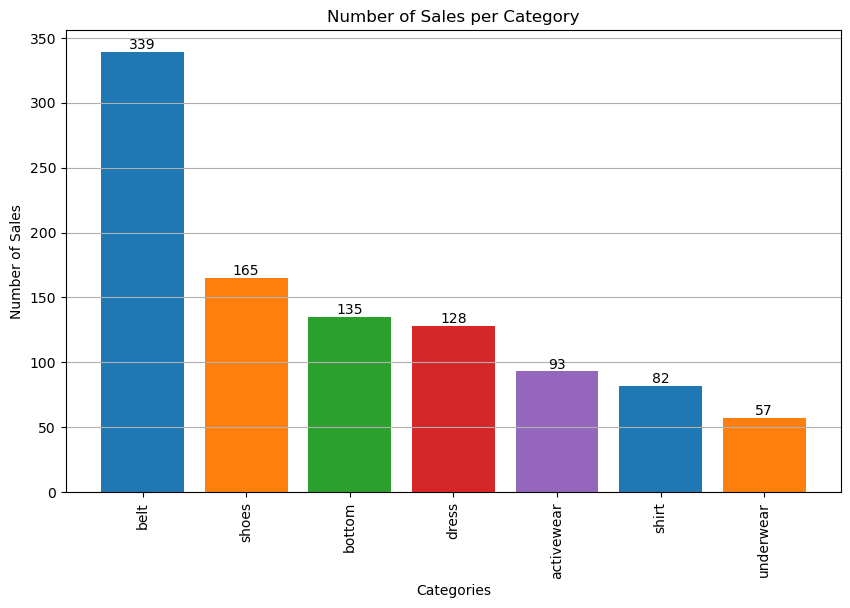

In [73]:
# visualize these sales using a bar chart
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"] 

plt.figure(figsize=(10,6))  
plt.bar(sales_per_category.index, sales_per_category.values, color=colors[:len(sales_per_category)])
plt.xlabel('Categories')
plt.ylabel('Number of Sales')
plt.title('Number of Sales per Category')
plt.xticks(rotation=90)
plt.grid(True, axis='y')

for index, value in enumerate(sales_per_category.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [75]:
# calculate the average stars assigned to products grouped by product category
average_stars_per_category = dtfashion.groupby('category')['stars'].mean()
average_stars_per_category_desc = average_stars_per_category.sort_values(ascending=False)
average_stars_per_category_desc

category
belt          3.103245
shoes         3.072727
underwear     3.052632
bottom        2.985185
dress         2.976562
activewear    2.849462
shirt         2.780488
Name: stars, dtype: float64

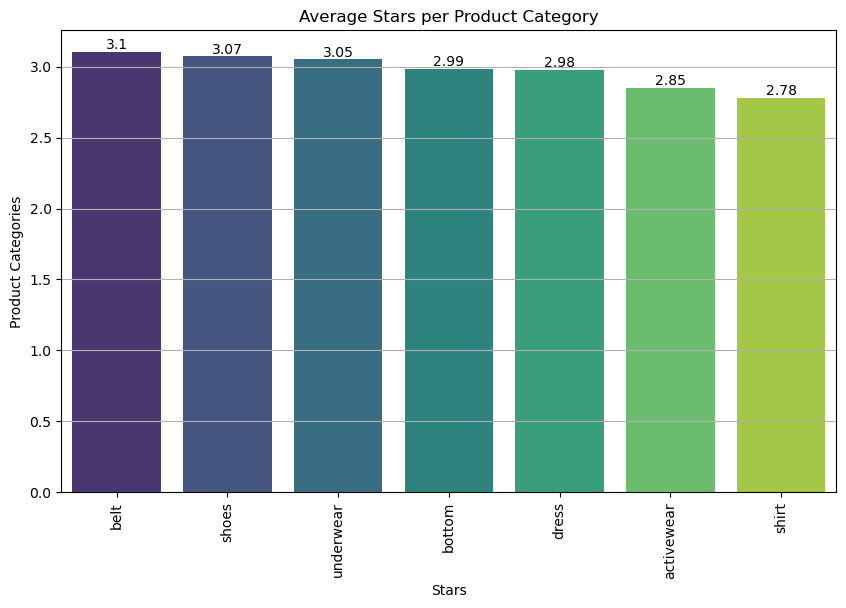

In [83]:
# create a bar chart to show the average stars per product category 
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(
    x=average_stars_per_category_desc.index, 
    y=average_stars_per_category_desc.values, 
    hue=average_stars_per_category_desc.index,  # assign x to hue
    dodge=False, 
    palette="viridis", 
    legend=False
)

plt.xlabel('Stars')
plt.ylabel('Product Categories')
plt.title('Average Stars per Product Category')
plt.xticks(rotation=90)
plt.grid(True, axis='y')

for index, value in enumerate(average_stars_per_category_desc.values):
    plt.text(index, value, s=round(value, 2), ha='center', va='bottom')

plt.show()


In [87]:
# calculate the number of products grouped by their corresponding price level
products_per_price_level = dtfashion['level'].value_counts()
products_per_price_level

level
premium    433
cheap      332
average    234
Name: count, dtype: int64

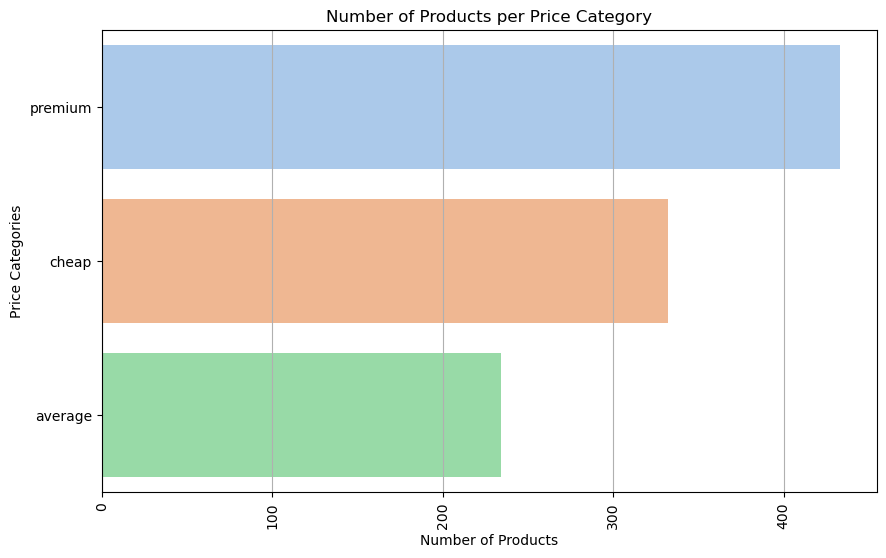

In [93]:
# create a bar chart for products grouped by price level
colors = sns.color_palette("pastel", n_colors=len(products_per_price_level))

plt.figure(figsize=(10,6))
bar_plot = sns.barplot(
    x=products_per_price_level.values,
    y=products_per_price_level.index,
    palette=colors,
    hue=products_per_price_level.index,
    dodge=False,
    legend=False
)
plt.xlabel('Number of Products')
plt.ylabel('Price Categories')
plt.title('Number of Products per Price Category')
plt.xticks(rotation=90)
plt.grid(True, axis='x')
plt.show()

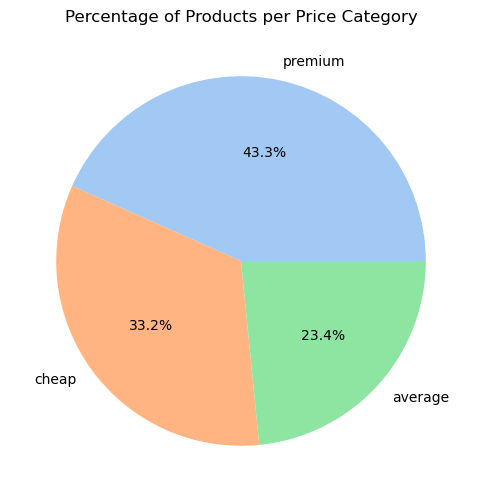

In [95]:
# create a pie chart for products grouped by price level
plt.figure(figsize=(10, 6))
plt.pie(products_per_price_level.values, labels=products_per_price_level.index, autopct='%1.1f%%', colors=sns.color_palette("pastel", len(products_per_price_level)))
plt.title('Percentage of Products per Price Category')
plt.show()

In [97]:
# calculate the average stars assigned to products grouped by price category
avg_stars_per_price_level = dtfashion.groupby('level')['stars'].mean()
avg_stars_per_price_level_desc = avg_stars_per_price_level.sort_values(ascending=False)
avg_stars_per_price_level_desc

level
average    3.047009
cheap      3.042169
premium    2.972286
Name: stars, dtype: float64

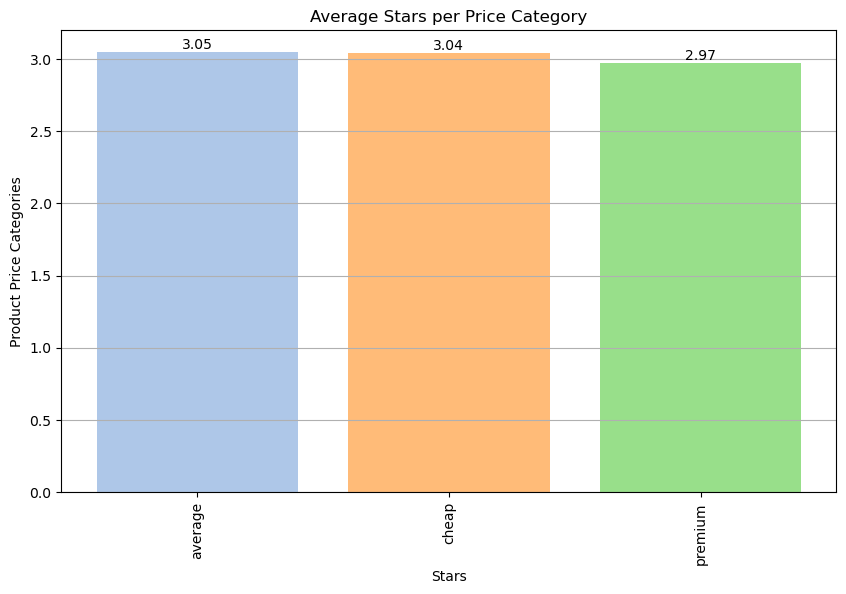

In [115]:
# create a line chart to show the average stars assigned to each price category
colors = ["#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5"]  

plt.figure(figsize=(10, 6))
for i, (category, value) in enumerate(avg_stars_per_price_level_desc.items()):
    plt.bar(category, value, color=colors[i % len(colors)])

plt.xlabel('Stars')
plt.ylabel('Product Price Categories')
plt.title('Average Stars per Price Category')
plt.xticks(rotation=90)
plt.grid(True, axis='y')

for index, value in enumerate(avg_stars_per_price_level_desc.values):
    plt.text(index, value, s=round(value, 2), ha='center', va='bottom')

plt.show()


In [117]:
# calculate the number of subscriptions per year
subscriptions_per_year = dtfashion['subscription_year'].value_counts()
subscriptions_per_year

subscription_year
2021    415
2020    293
2022    291
Name: count, dtype: int64

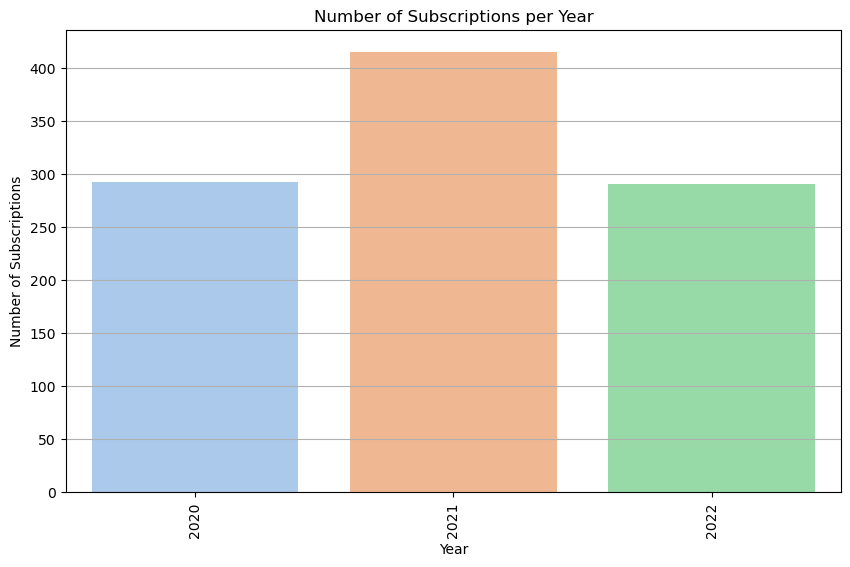

In [127]:
# visualize the subscriptions grouped by year using a bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x=subscriptions_per_year.index, 
    y=subscriptions_per_year.values, 
    hue=subscriptions_per_year.index, 
    palette="pastel",
    dodge=False,
    legend=False
)

plt.xlabel('Year')
plt.ylabel('Number of Subscriptions')
plt.title('Number of Subscriptions per Year')
plt.grid(True, axis='y')
plt.xticks(rotation=90)

plt.show()

In [129]:
# calculate the number of people grouped by country of origin
people_per_country = dtfashion['country'].value_counts()
people_per_country

country
it    451
uk    337
fr    211
Name: count, dtype: int64

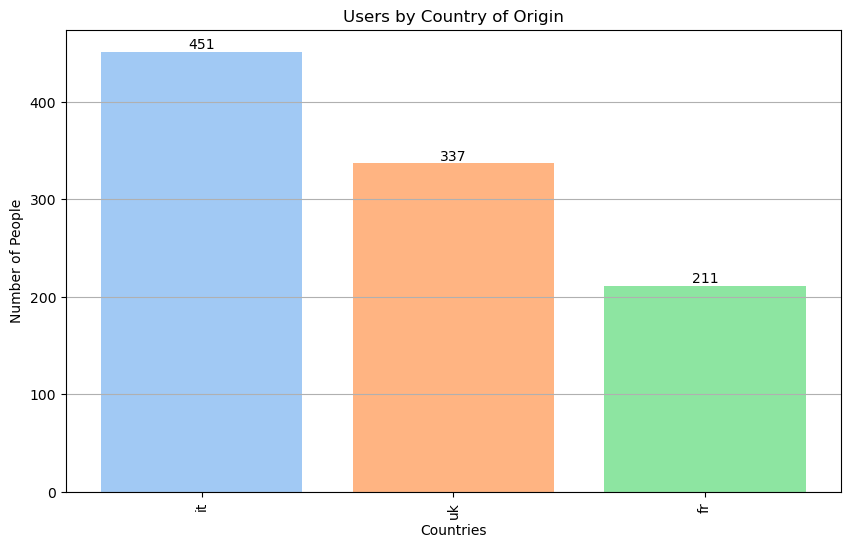

In [137]:
# create a bar chart showing the distribution of people by country of origin
colors = sns.color_palette("pastel", len(people_per_country))

plt.figure(figsize=(10, 6))
bars = plt.bar(people_per_country.index, people_per_country.values, color=colors)
plt.xlabel('Countries')
plt.ylabel('Number of People')
plt.title('Users by Country of Origin')
plt.grid(True, axis='y')
plt.xticks(rotation=90)

# add numbers above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.show()

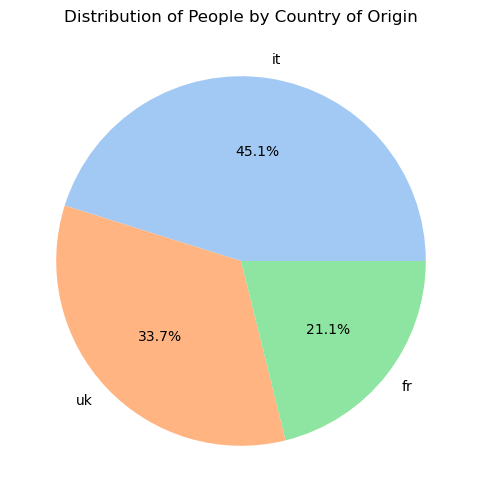

In [139]:
# create a pie chart showing the distribution of people by country of origin
colors = sns.color_palette("pastel", len(people_per_country))

plt.figure(figsize=(10, 6))
plt.pie(people_per_country.values, labels=people_per_country.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of People by Country of Origin')
plt.show()

In [141]:
# calculate the average stars assigned to sales grouped by the user's country of origin
avg_stars_per_country = dtfashion.groupby('country')['stars'].mean()
avg_stars_per_country_desc = avg_stars_per_country.sort_values(ascending=False)
avg_stars_per_country_desc

country
uk    3.136499
fr    3.080569
it    2.889135
Name: stars, dtype: float64

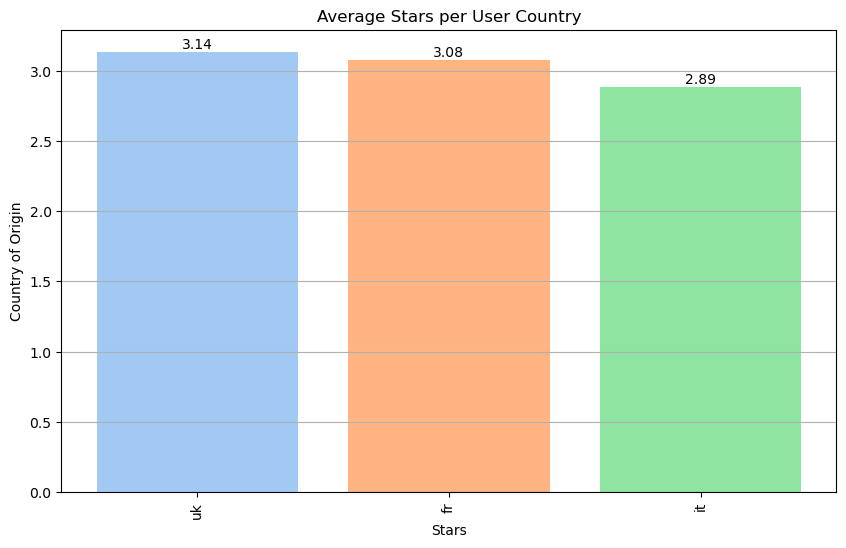

In [147]:
# create a bar chart to show the average stars assigned to each user's country
colors = sns.color_palette("pastel", len(avg_stars_per_country_desc))

plt.figure(figsize=(10, 6))
plt.bar(
    avg_stars_per_country_desc.index, 
    avg_stars_per_country_desc.values, 
    color=colors
)
plt.xlabel('Stars')
plt.ylabel('Country of Origin')
plt.title('Average Stars per User Country')
plt.xticks(rotation=90)
plt.grid(True, axis='y')

for index, value in enumerate(avg_stars_per_country_desc.values):
    plt.text(index, value, s=round(value, 2), ha='center', va='bottom')

plt.show()

## User Distribution by Cluster

Using the clustering results obtained from the SQL query, we categorized users into four clusters based on their total sales and average ratings (stars):

- **Gabriel**: Low sales, low ratings  
- **Emily**: Low sales, high ratings  
- **Camille**: High sales, low ratings  
- **Sylvie**: High sales, high ratings  

To visualize the distribution of users across these clusters, we created two charts:

1. **Bar Chart (%)**  
   - Shows the percentage of users in each cluster.  
   - Each bar is labeled with the corresponding percentage, making it easy to compare clusters.  

2. **Pie Chart**  
   - Represents the same distribution as a pie, showing both the percentage and the absolute number of users per cluster.  
   - Provides an intuitive view of how users are divided among clusters.

These visualizations provide a clear and immediate understanding of the user segmentation without generating external files.

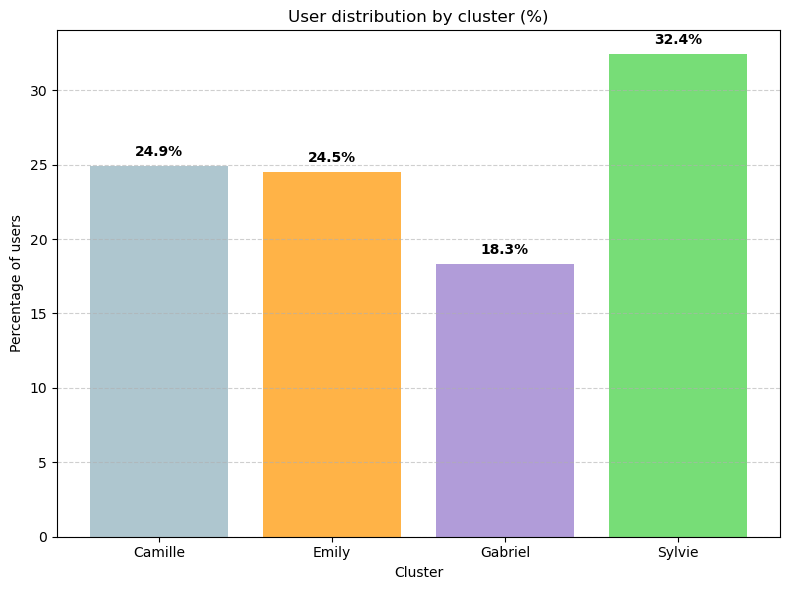

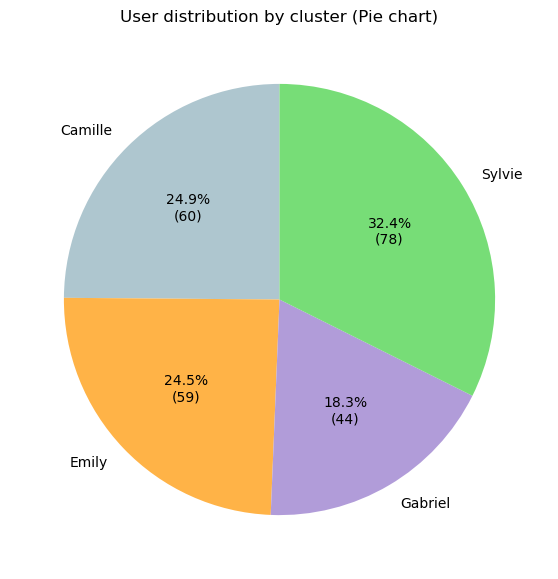

In [152]:
# Data
clusters = ["Camille", "Emily", "Gabriel", "Sylvie"]
pct_users = [24.9, 24.5, 18.3, 32.4]
user_counts = [60, 59, 44, 78]

# Pastel color palette
colors = ["#AEC6CF", "#FFB347", "#B19CD9", "#77DD77"]  

# --- Bar chart with labels ---
plt.figure(figsize=(8,6))
bars = plt.bar(clusters, pct_users, color=colors)
plt.title("User distribution by cluster (%)")
plt.xlabel("Cluster")
plt.ylabel("Percentage of users")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add labels on bars
for bar, pct in zip(bars, pct_users):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{pct:.1f}%", 
             ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

# --- Pie chart with percentages and counts below ---
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    pct_users, labels=clusters, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize':10}
)
plt.title("User distribution by cluster (Pie chart)")

# Add user counts below percentages
for i, (pct_text, count) in enumerate(zip(autotexts, user_counts)):
    pct_text.set_text(f"{pct_text.get_text()}\n({count})")  

plt.show()
